# Demonstrations

## Significance and the Student's t Distribution

In linear regression, we are often interested in not only the best-fit parameters $\hat \beta$ but also their associated uncertainties. If we know the scatter $\sigma$ of $y$ and it is normally distributed, the best-fit parameters will also be normally distributed according to $\sigma^2_{\hat \beta} = \sigma^2 (X^T X)^{-1}$. This allows us to easily determine confidence intervals and perform hypothesis testing, i.e.,
$$\frac{\hat \beta_j - \beta_j}{\sigma_{\hat \beta_j}}$$
follows a normal distribution with $0$ mean and unit variance. However, in practice, we often do not know the scatter $\sigma$ and have to estimate it from the data itself via
$$\hat \sigma^2 = \frac{1}{n - p - 1} \sum\limits_{i=1}^n (y - \hat y)^2 \, .$$
In that case,
$$\frac{\hat \beta_j - \beta_j}{\hat \sigma_{\hat \beta_j}}$$
follows a student's t distribution with $n - p - 1$ degrees of freedom. In practice, this only really matters if $n - p - 1$ is of order $10$ or less.

Text(0.5, 1.0, "Student's t Distribution")

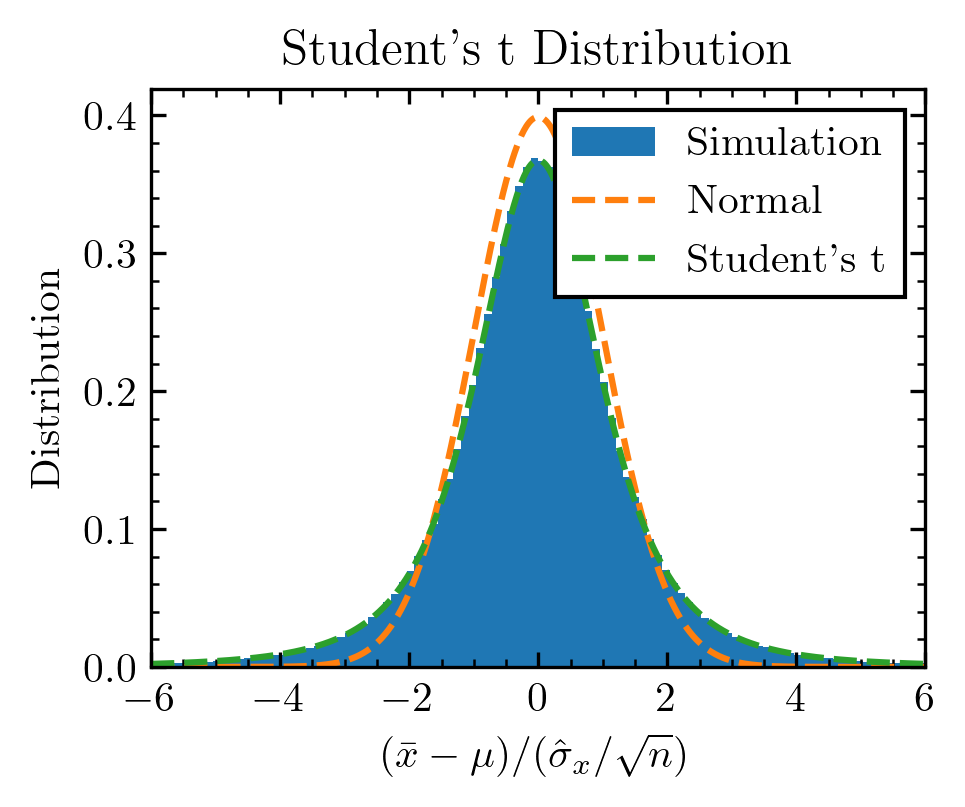

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm, t

n = 4
x = np.random.normal(size=(10**6, n))
x = np.mean(x, axis=1) / (np.std(x, ddof=1, axis=1) / np.sqrt(n))
plt.hist(x, bins=np.linspace(-6,+6, 101), density=True, label='Simulation')
plt.xlim(-6, +6)
x = np.linspace(-6, +6, 1000)
plt.plot(x, norm.pdf(x), ls='--', label='Normal')
plt.plot(x, t.pdf(x, n - 1), ls='--', label="Student's t")
plt.xlabel(r'$(\bar x - \mu) / (\hat \sigma_x / \sqrt{n})$')
plt.ylabel(r'Distribution')
plt.legend(loc='best')
plt.title("Student's t Distribution")

## Overfitting

Text(0, 0.5, '$y$')

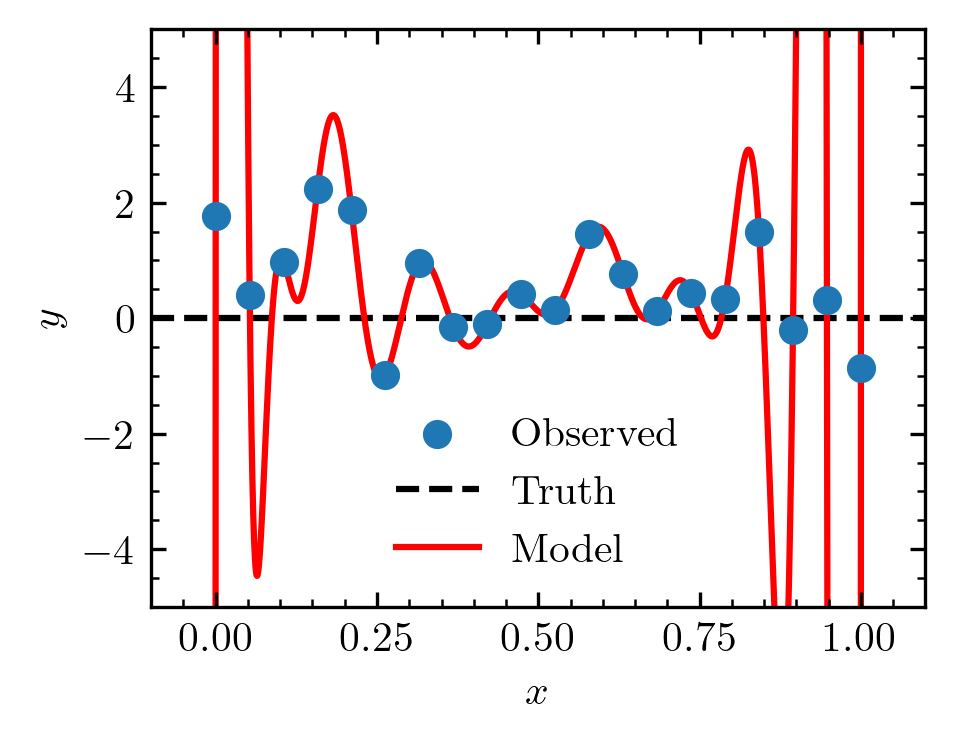

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
x = np.linspace(0, 1, 20)
y = np.random.normal(size=len(x))
plt.scatter(x, y, label='Observed')
plt.axhline(0, ls='--', color='black', zorder=-2, label='Truth')
p = np.polynomial.Polynomial.fit(x, y, len(x) - 1)
x = np.linspace(-0.1, 1.1, 10000)
plt.plot(x, p(x), color='red', zorder=-1, label='Model')
plt.xlim(-0.1, 1.1)
plt.ylim(-5, +5)
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$y$')

## Coefficient of Determination

Text(0.5, 1.0, 'Coefficient of Determination')

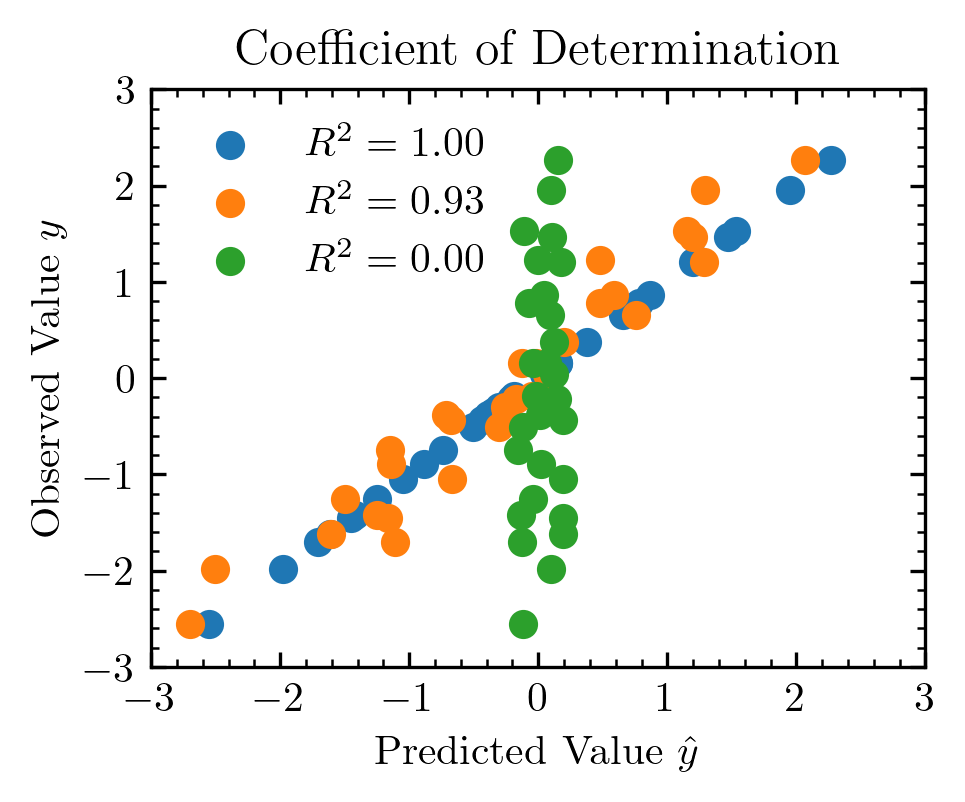

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

y = np.random.normal(size=30)
y_pred_1 = y
y_pred_2 = np.sqrt(1 - 0.4**2) * y + np.random.normal(scale=0.4, size=len(y))
y_pred_3 = np.random.normal(scale=0.1, size=len(y))

for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    plt.scatter(y_pred, y, label=rf'$R^2 = {r2_score(y, y_pred):.2f}$')

plt.legend(loc='upper left', frameon=False)
plt.xlim(-3, +3)
plt.ylim(-3, +3)
plt.xlabel(r'Predicted Value $\hat y$')
plt.ylabel(r'Observed Value $y$')
plt.title('Coefficient of Determination')

# Exercise

In this exercise, we will gain some hands-on experience with overfitting and cross-validation in machine learning. We will see how increasing model complexity leads to reduced errors on the training set but a lack of generalizability on unseen data.

Below, you will find code that creates some training data (`X_train` and `y_train`) as well as so-called test data (`X_test` and `y_test`). `X_train` and `X_test` contain the independent variables. For simplicity, we assume a single independent variable. However, to maintain compatibility with the `scikit-learn` syntax, they are given as two-dimensional arrays of shape `(n, 1)`.

I'm providing you with the `LinearPolyRegression` class that uses the same `fit(X, y)` and `predict(X)` interface as all other classes in `scikit-learn` to perform polynomial regression. Its only hyperparameter is the polynomial degree $p$. Finally, I'm also providing the true relation between $x$ and $y$ via the function `f(X)`.

(a) Determine the $R^2$ score (see `sklearn.metrics.r2_score`) for the training set as a function of polynomial degree $p$. In other words, determine the $R^2$ score of the predicted $y$-values with respect to the $y$-values used in the training. The polynomial degree should go from $1$ to $20$. What do you observe and why?

(b) Finally, determine the $R^2$ of the trained model applied to the test data, `X_test` and `y_test`. What do you see? Do your results agree with part (a)? Why or why not?

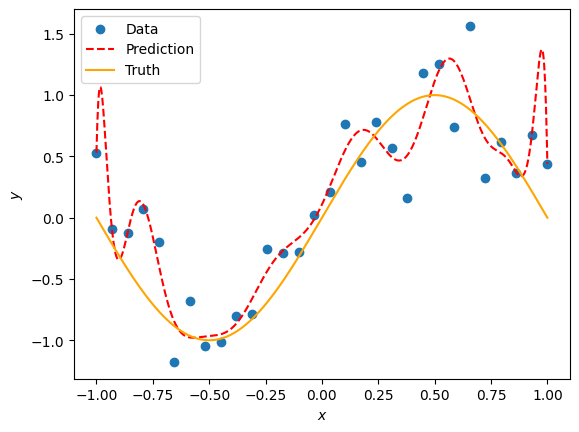

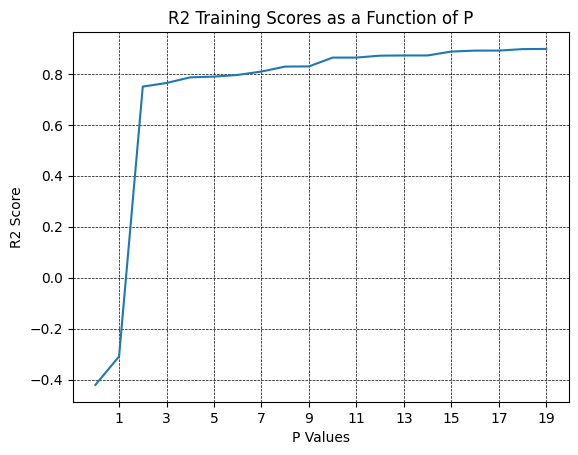

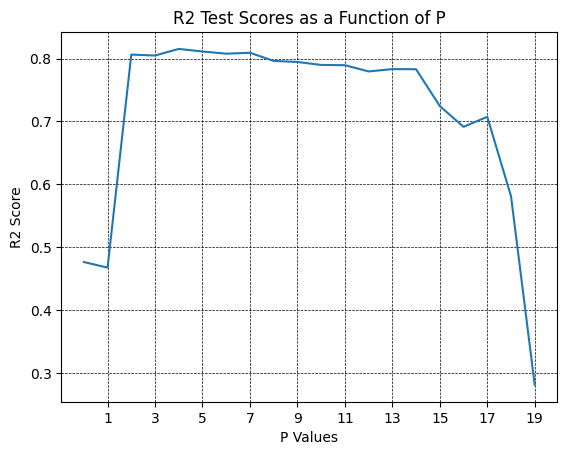

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, RegressorMixin

def f(X):
    return np.sin(X[:, 0] * np.pi)

class LinearPolyRegression(BaseEstimator, RegressorMixin):

    def __init__(self, p=1):
        self.p = p

    def fit(self, X, y):
        X = np.column_stack([
            np.ones(len(X))] + [X**i for i in range(1, self.p + 1)])
        self.beta = np.linalg.lstsq(X, y)[0]
        return self

    def predict(self, X):
        X = np.column_stack([
            np.ones(len(X))] + [X**i for i in range(1, self.p + 1)])
        return X @ self.beta

np.random.seed(0)
X_train = np.linspace(-1, +1, 30).reshape(-1, 1)
y_train = f(X_train) + np.random.normal(size=len(X_train)) * 0.3

X_test = np.linspace(-1, +1, 100).reshape(-1, 1)
y_test = f(X_test) + np.random.normal(size=len(X_test)) * 0.3

plt.scatter(X_train[:, 0], y_train, label='Data')
reg = LinearPolyRegression(p=16).fit(X_train, y_train)
X = np.linspace(-1, +1, 1000).reshape(-1, 1)
y_pred = reg.predict(X)
plt.plot(X[:, 0], y_pred, color='red', ls='--', label='Prediction')
plt.plot(X[:, 0], f(X), color='orange', ls='-', label='Truth')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='best')
plt.show()


def r2_train(p):
    model = LinearPolyRegression(p=p).fit(X_train, y_train)
    y_pred_p = model.predict(X_train)
    r2 = r2_score(y_pred_p, y_train)
    return r2

def r2_test(p):
    model = LinearPolyRegression(p=p).fit(X_train, y_train)
    y_pred_p = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_p)
    return r2

# a)
r2_list = []
for p in range(1, 21):
    r2_list.append(r2_train(p))

plt.plot(r2_list)
plt.title('R2 Training Scores as a Function of P')
plt.xlabel('P Values')
plt.xticks(np.arange(1, 21, 2))
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.ylabel('R2 Score')
plt.show()


# b)
r2_list = []
for p in range(1, 21):
    r2_list.append(r2_test(p))

plt.plot(r2_list)
plt.title('R2 Test Scores as a Function of P')
plt.xlabel('P Values')
plt.xticks(np.arange(1, 21, 2))
plt.ylabel('R2 Score')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()